In [17]:
!pip install tensorflow
!pip install keras

In [25]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Set path
filename = '/content/drive/MyDrive/Canada'

# Automatically find class names from 'train' folder
classes = os.listdir(os.path.join(filename, 'train'))
print("Classes:", classes)

# Label encoder
lb = LabelEncoder()
lb.fit(classes)  # Fit once, use consistently

# Function to load dataset
def load_dataset(split):
    X = []
    y = []
    for class_name in classes:
        path = os.path.join(filename, split, class_name)
        for img_name in tqdm(os.listdir(path), desc=f'Loading {split}/{class_name}'):
            img = cv2.imread(os.path.join(path, img_name))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (28, 28))
            img = cv2.normalize(img, None, 0, 1.0, cv2.NORM_MINMAX, dtype=cv2.CV_32F)
            X.append(img)
            y.append(class_name)
    X = np.array(X).reshape(-1, 28, 28, 1)
    y = lb.transform(y)
    return X, y

# Load all sets
X_train, y_train = load_dataset('train')
X_valid, y_valid = load_dataset('valid')
X_test, y_test = load_dataset('test')

print("Train:", X_train.shape, y_train.shape)
print("Valid:", X_valid.shape, y_valid.shape)
print("Test:", X_test.shape, y_test.shape)


Classes: ['wildfire', 'nowildfire']


Loading test/nowildfire: 100%|██████████| 2871/2871 [01:50<00:00, 25.92it/s] 

Train: (30430, 28, 28, 1) (30430,)
Valid: (6320, 28, 28, 1) (6320,)
Test: (6411, 28, 28, 1) (6411,)


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_17 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_layer (Flatten)         │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,410 (474.26 KB)

 Trainable params: 121,410 (474.26 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/27
476/476 - 33s - 69ms/step - accuracy: 0.6839 - loss: 0.6000 - val_accuracy: 0.7492 - val_loss: 0.5234 - learning_rate: 1.0000e-03
Epoch 2/27
476/476 - 39s - 82ms/step - accuracy: 0.7546 - loss: 0.5176 - val_accuracy: 0.7965 - val_loss: 0.4539 - learning_rate: 1.0000e-03
Epoch 3/27
476/476 - 40s - 84ms/step - accuracy: 0.7818 - loss: 0.4774 - val_accuracy: 0.8063 - val_loss: 0.4279 - learning_rate: 1.0000e-03
Epoch 4/27
476/476 - 28s - 59ms/step - accuracy: 0.7902 - loss: 0.4623 - val_accuracy: 0.7987 - val_loss: 0.4433 - learning_rate: 1.0000e-03
Epoch 5/27
476/476 - 44s - 92ms/step - accuracy: 0.7978 - loss: 0.4463 - val_accuracy: 0.8198 - val_loss: 0.4082 - learning_rate: 1.0000e-03
Epoch 6/27
476/476 - 39s - 81ms/step - accuracy: 0.8047 - loss: 0.4366 - val_accuracy: 0.7758 - val_loss: 0.4991 - learning_rate: 1.0000e-03
Epoch 7/27
476/476 - 42s - 88ms/step - accuracy: 0.8099 - loss: 0.4308 - val_accuracy: 0.8158 - val_loss: 0.4094 - learning_rate: 1.0000e-03
Epoch 8/27
47

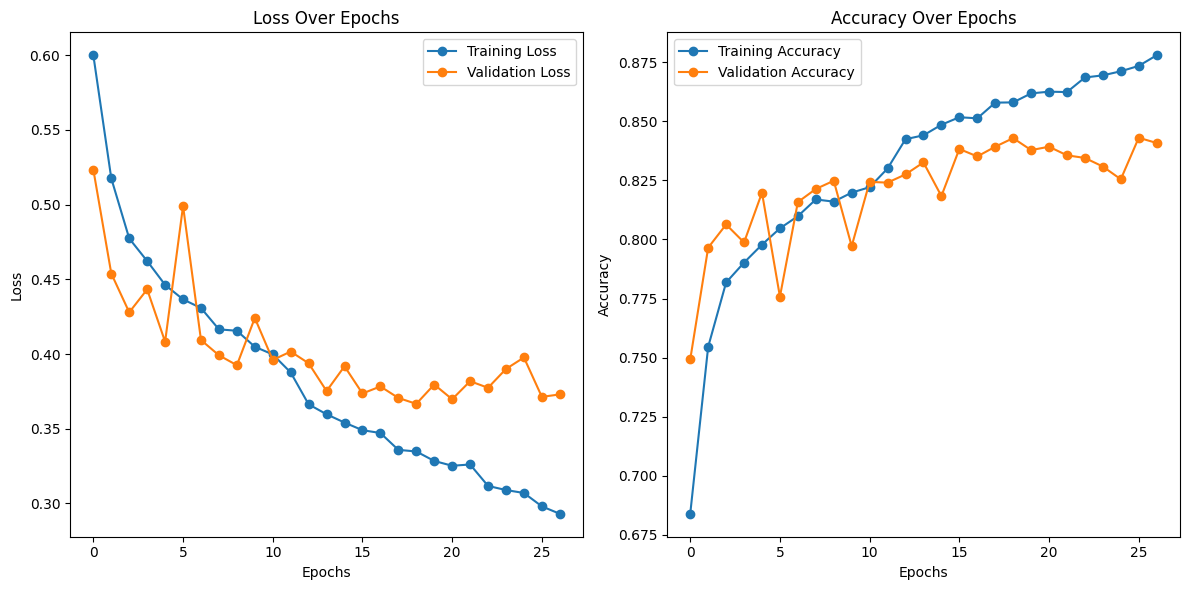

951/951 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Shape of X_train_features: (30430, 1600)
Shape of X_train_features: (6411, 1600)


In [ ]:
# Define input shape
input_shape = (28, 28, 1)
inputs = tf.keras.Input(shape=input_shape)

# Block 1
x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.3)(x)

# Block 2
x = layers.Conv2D(64, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten and Dense layers
x = layers.Flatten(name='feature_layer')(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(classes), activation='softmax')(x)

# Define model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1
)


# Train the model
history = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_scheduler],
    verbose=2
)


# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Final Training Accuracy from last epoch
final_train_acc = history.history['accuracy'][-1]

# Final Validation Accuracy from last epoch
final_val_acc = history.history['val_accuracy'][-1]

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print all results
print("✅ Final Results:")
print(f"Final Training Accuracy:    {final_train_acc:.4f}")
print(f"Final Validation Accuracy:  {final_val_acc:.4f}")
print(f"Final Test Accuracy:        {test_acc:.4f}")

# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

# Create a feature extraction model up to a certain layer
feature_extractors = models.Model(inputs=model.input, outputs=model.get_layer('feature_layer').output)

# Extract features from the trained model
X_train_features = feature_extractors.predict(X_train)
X_test_features = feature_extractors.predict(X_test)

# Now, X_train_features and X_test_features contain the extracted features
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_train_features:", X_test_features.shape)


model1 = SVC(kernel='poly')

model1.fit(X_train_features,y_train)
prediction = model1.predict(X_test_features)
print(classification_report(y_test, prediction))


Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)     │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_layer (Flatten)         │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,506 (1.61 MB)

 Trainable params: 421,058 (1.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/27
476/476 - 67s - 141ms/step - accuracy: 0.7277 - loss: 0.5938 - val_accuracy: 0.5547 - val_loss: 5.5116 - learning_rate: 1.0000e-03
Epoch 2/27
476/476 - 79s - 167ms/step - accuracy: 0.7832 - loss: 0.4693 - val_accuracy: 0.6883 - val_loss: 0.9098 - learning_rate: 1.0000e-03
Epoch 3/27
476/476 - 59s - 124ms/step - accuracy: 0.8014 - loss: 0.4428 - val_accuracy: 0.5807 - val_loss: 1.0513 - learning_rate: 1.0000e-03
Epoch 4/27
476/476 - 83s - 173ms/step - accuracy: 0.8140 - loss: 0.4174 - val_accuracy: 0.7544 - val_loss: 0.5058 - learning_rate: 1.0000e-03
Epoch 5/27
476/476 - 82s - 172ms/step - accuracy: 0.8232 - loss: 0.4021 - val_accuracy: 0.8264 - val_loss: 0.4010 - learning_rate: 1.0000e-03
Epoch 6/27
476/476 - 82s - 172ms/step - accuracy: 0.8311 - loss: 0.3898 - val_accuracy: 0.8000 - val_loss: 0.4617 - learning_rate: 1.0000e-03
Epoch 7/27
476/476 - 81s - 171ms/step - accuracy: 0.8358 - loss: 0.3775 - val_accuracy: 0.8552 - val_loss: 0.3490 - learning_rate: 1.0000e-03
Epoch 

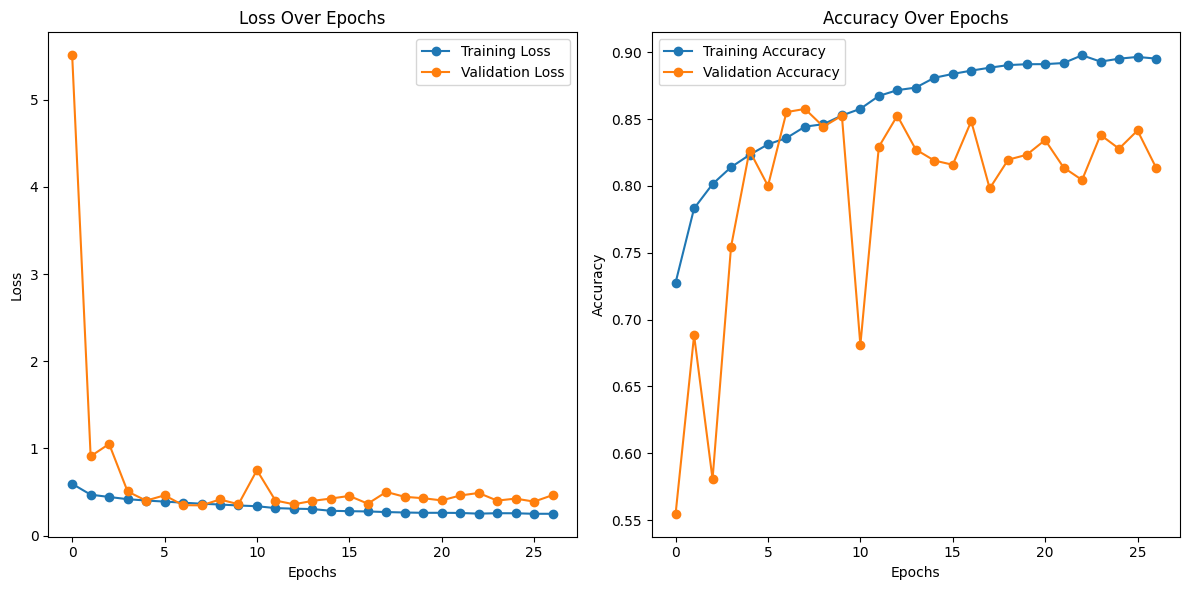

951/951 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
Shape of X_train_features: (30430, 3136)
Shape of X_train_features: (6411, 3136)


In [24]:
# Modified
from tensorflow.keras import layers, models, callbacks

# Define input shape
input_shape = (28, 28, 1)
inputs = tf.keras.Input(shape=input_shape)

# Block 1
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Block 2
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Dropout(0.25)(x)

# Flatten and Dense layers
x = layers.Flatten(name='feature_layer')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(len(classes), activation='softmax')(x)

# Define model
model = models.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()
# Callbacks
lr_scheduler = callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1
)
#early_stop = callbacks.EarlyStopping(
    #monitor='val_loss', patience=8, restore_best_weights=True, verbose=1
#)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=27,
    batch_size=64,
    validation_data=(X_valid, y_valid),
    callbacks=[lr_scheduler], #early_stop
    verbose=2
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

# Final Training Accuracy from last epoch
final_train_acc = history.history['accuracy'][-1]

# Final Validation Accuracy from last epoch
final_val_acc = history.history['val_accuracy'][-1]

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

# Print all results
print("✅ Final Results:")
print(f"Final Training Accuracy:    {final_train_acc:.4f}")
print(f"Final Validation Accuracy:  {final_val_acc:.4f}")
print(f"Final Test Accuracy:        {test_acc:.4f}")


# Plot Training & Validation Loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


# Create a feature extraction model up to a certain layer
feature_extractor = models.Model(inputs=model.input, outputs=model.get_layer('feature_layer').output)

# Extract features from the trained model
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

# Now, X_train_features and X_test_features contain the extracted features
print("Shape of X_train_features:", X_train_features.shape)
print("Shape of X_train_features:", X_test_features.shape)


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier

model1 = SVC(kernel='poly')

model1.fit(X_train_features,y_train)
prediction = model1.predict(X_test_features)
print(classification_report(y_test, prediction))


In [ ]:
model2 = RandomForestClassifier()
model2.fit(X_train_features,y_train)
prediction = model2.predict(X_test_features)
print(classification_report(y_test, prediction))


In [ ]:
model3 = xgb.XGBClassifier()
model3.fit(X_train_features,y_train)
prediction = model3.predict(X_test_features)
print(classification_report(y_test, prediction))

In [ ]:
model4 = LogisticRegression()
model4.fit(X_train_features,y_train)
prediction = model4.predict(X_test_features)
print(classification_report(y_test, prediction))